In [1]:
import torch.nn as nn
from GRU_pipeline import DataHolder, paths, dicDataset, GRUModel, pad_collate, HierarchicalDataset, Pipeline

DH = DataHolder(**paths)
#HD = HierarchicalDataset(DH)
#dl = HD.dataloader()
#DH.openface_tensor[1] = DH.openface_tensor[1]/5
#DH.openface_tensor[2] = DH.openface_tensor[2]/5

In [2]:
output = DH.make_train_test_datasets(test_size = .15, val_size = .17)
class_weights = output['class_weights']
openface_1  = output['datasets']['openface_1']
openface_2  = output['datasets']['openface_2']
#opensmile_1 = output['datasets']['opensmile_1']
#opensmile_2 = output['datasets']['opensmile_2']

Training on cpu
loss epoch 10: 1.914751
loss epoch 20: 1.890426
loss epoch 30: 1.922970
loss epoch 40: 1.901367
loss epoch 50: 1.903425


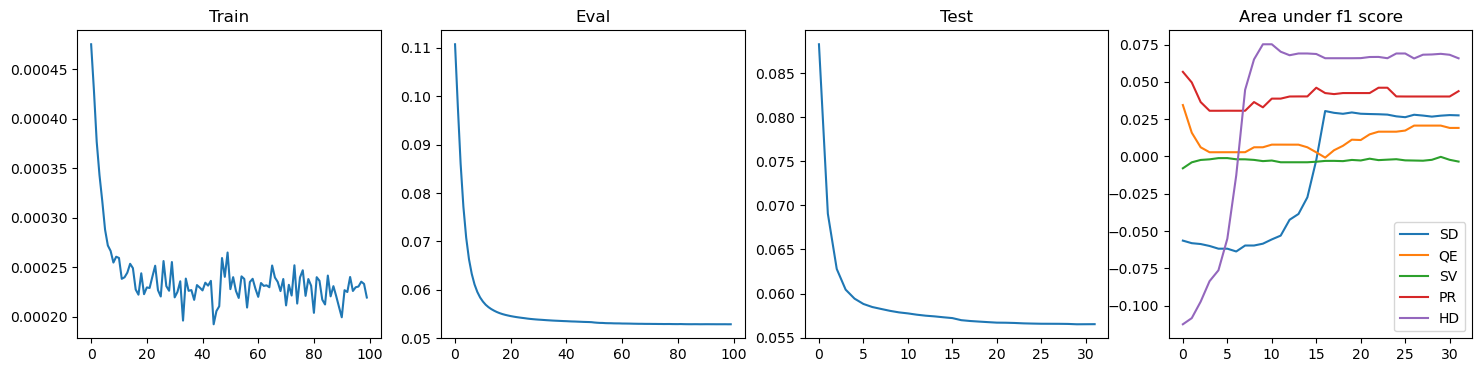

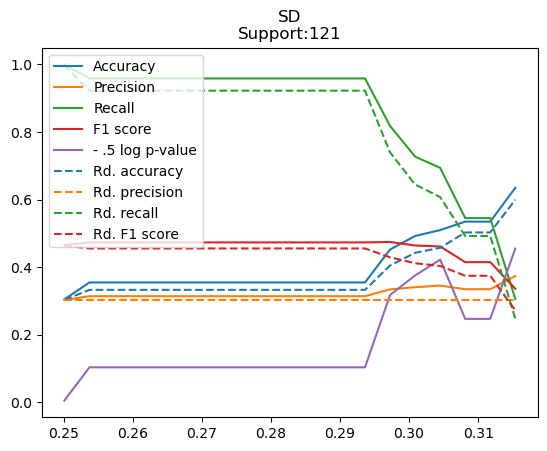

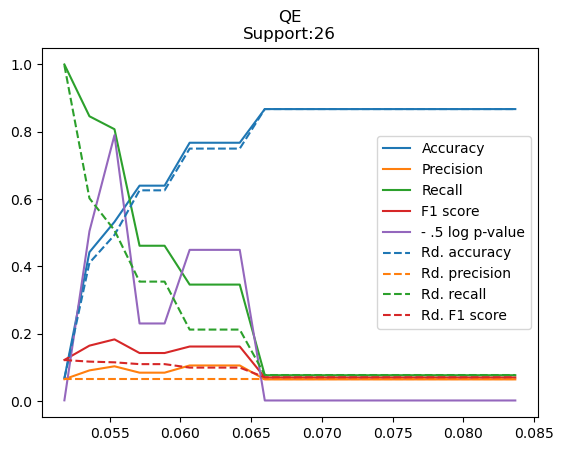

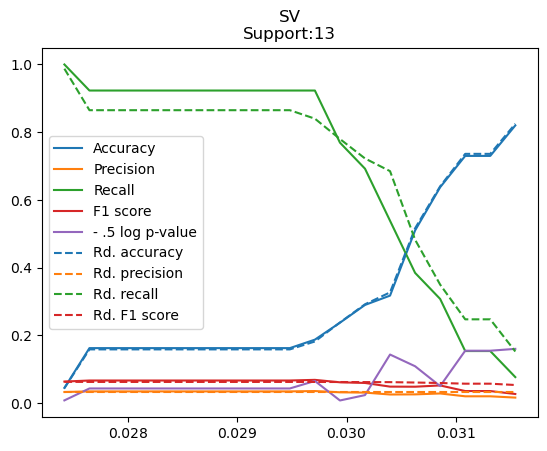

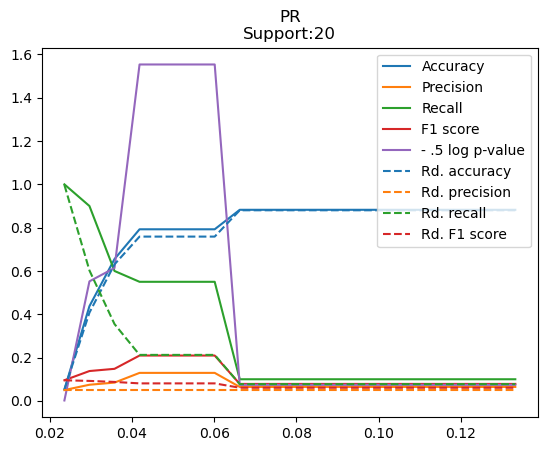

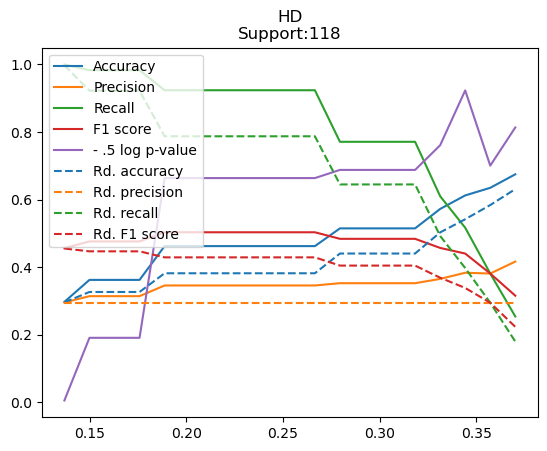

[0.027149396237550836,
 0.01915398683390408,
 -0.0032355480148513745,
 0.043809304239202575,
 0.0681167661828385]

In [12]:
#MSE
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':8,
    'output_dim':5,
    'dropout_prob':.1
}

mseloss = nn.MSELoss()
def my_loss(pred, true):
    return mseloss(pred, 3*true)

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    #'criterion':nn.L1Loss()#weight=class_weights)
    #'criterion':nn.KLDivLoss(reduction='batchmean')
    #'criterion':my_loss
    'criterion':nn.MSELoss()
    #'criterion':nn.BCELoss()
    #'criterion':nn.MultiLabelMarginLoss()
    #'criterion':nn.MultiLabelSoftMarginLoss()

}
#pipe = Pipeline(**args)
pipe.train(epoch=50,lr=1e-3, early_stop=False)
pipe.plot_losses()
pipe.eval_model(plot=True)

Training on cpu
loss epoch 30: 6.308307
loss epoch 60: 6.198174
loss epoch 90: 6.274020
loss epoch 120: 6.220712
loss epoch 150: 6.262406


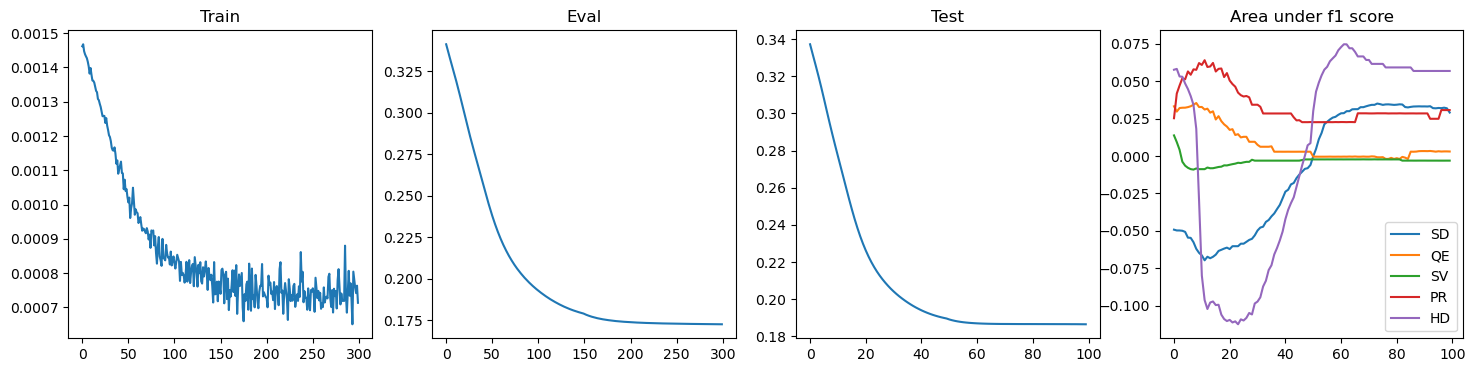

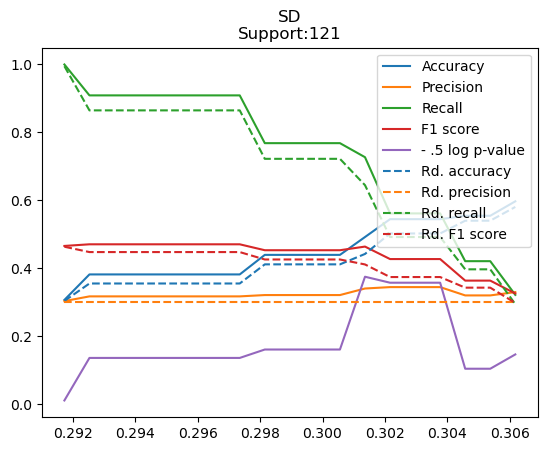

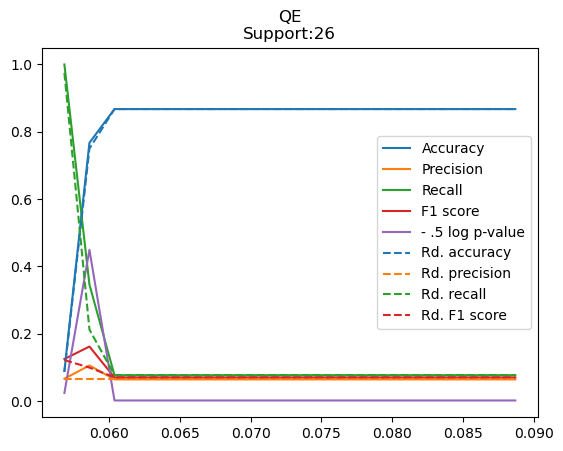

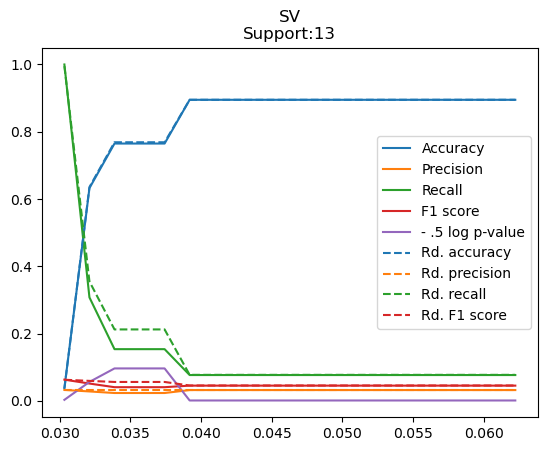

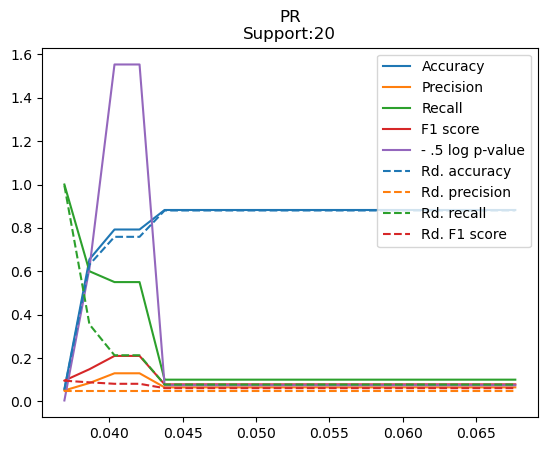

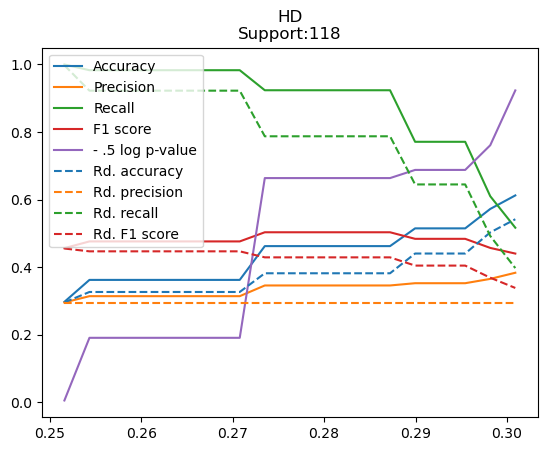

[0.029020141131424527,
 0.0029889602206084236,
 -0.003109241205785252,
 0.030674791345042834,
 0.05681959010035457]

In [8]:
#BCE
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':8,
    'output_dim':5,
    'dropout_prob':.1
}

mseloss = nn.MSELoss()
def my_loss(pred, true):
    return mseloss(pred, 3*true)

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    #'criterion':nn.L1Loss()#weight=class_weights)
    #'criterion':nn.KLDivLoss(reduction='batchmean')
    #'criterion':my_loss
    #'criterion':nn.MSELoss()
    'criterion':nn.BCELoss()
    #'criterion':nn.MultiLabelMarginLoss()
    #'criterion':nn.MultiLabelSoftMarginLoss()

}
#pipe = Pipeline(**args)
pipe.train(epoch=150,lr=1e-4, early_stop=False)
pipe.plot_losses()
pipe.eval_model(plot=True)

In [5]:
#MultiLabelMarginLoss
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':8,
    'output_dim':5,
    'dropout_prob':.1
}

mseloss = nn.MSELoss()
def my_loss(pred, true):
    return mseloss(pred, 3*true)

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    #'criterion':nn.L1Loss()#weight=class_weights)
    #'criterion':nn.KLDivLoss(reduction='batchmean')
    #'criterion':my_loss
    #'criterion':nn.MSELoss()
    #'criterion':nn.BCELoss()
    'criterion':nn.MultiLabelMarginLoss()
    #'criterion':nn.MultiLabelSoftMarginLoss()

}
pipe = Pipeline(**args)
pipe.train(epoch=50,lr=1e-3, early_stop=False)
pipe.plot_losses()
pipe.eval_model(plot=True)

Training on cpu
Can't apply loss to batch1


RuntimeError: inconsistent size [48] for argument #2 'target'

Training on cpu
loss epoch 10: 13.354417
loss epoch 20: 12.794666
loss epoch 30: 12.648824
loss epoch 40: 12.587703
loss epoch 50: 12.554487


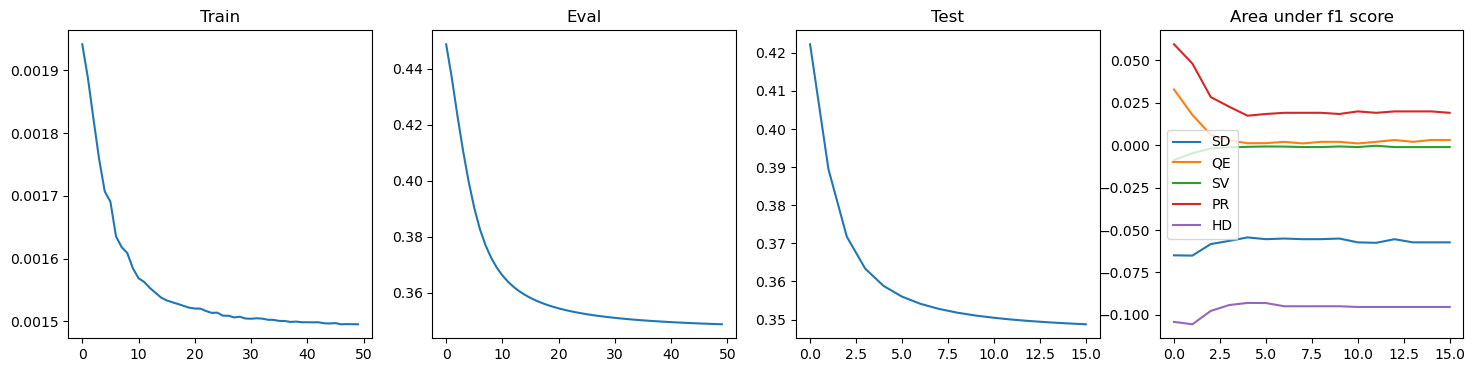

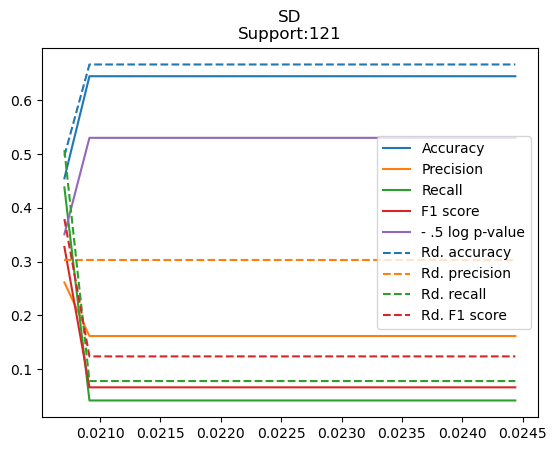

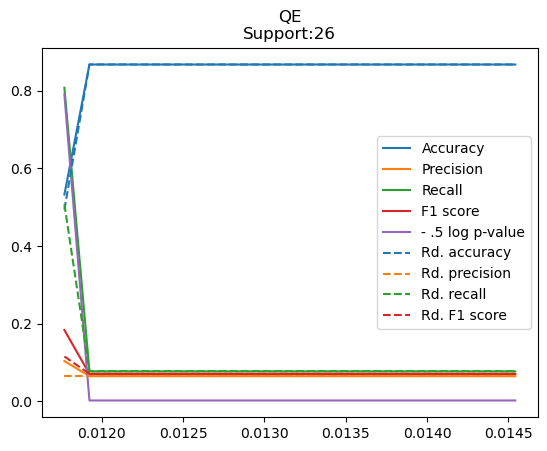

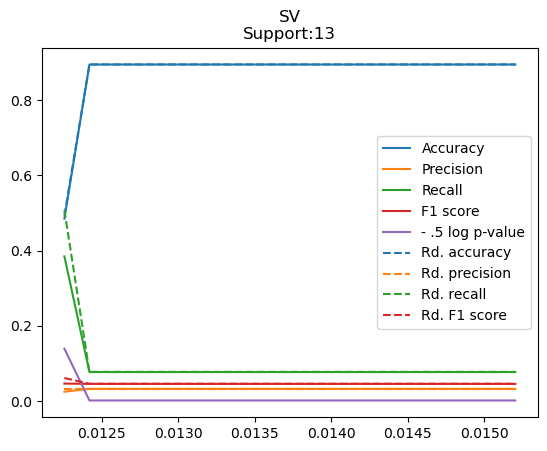

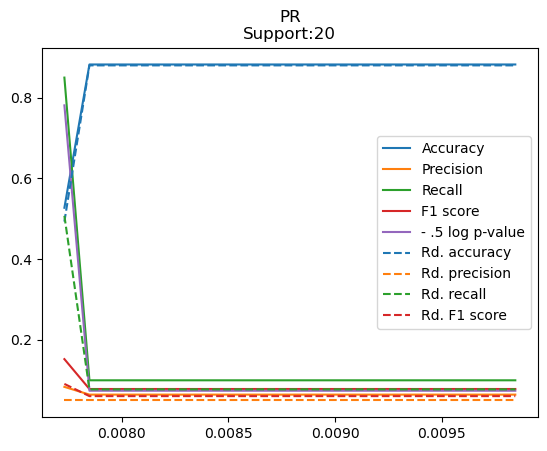

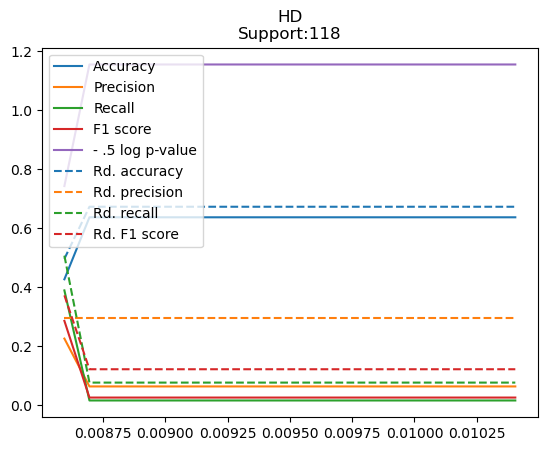

[-0.057298655996716935,
 0.0030890660344264527,
 -0.0011014752791068602,
 0.0199516861264213,
 -0.09541155938205294]

In [6]:
#MultiLabelSoftMarginLoss
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':8,
    'output_dim':5,
    'dropout_prob':.1
}

mseloss = nn.MSELoss()
def my_loss(pred, true):
    return mseloss(pred, 3*true)

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    #'criterion':nn.L1Loss()#weight=class_weights)
    #'criterion':nn.KLDivLoss(reduction='batchmean')
    #'criterion':my_loss
    #'criterion':nn.MSELoss()
    #'criterion':nn.BCELoss()
    #'criterion':nn.MultiLabelMarginLoss()
    'criterion':nn.MultiLabelSoftMarginLoss()

}
pipe = Pipeline(**args)
pipe.train(epoch=50,lr=1e-3, early_stop=False)
pipe.plot_losses()
pipe.eval_model(plot=True)